In [2]:
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import root_to_df, filter_region, filter_tag, drop_fakes, drop_twodim
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data_path = "../processed_data/"
signal = "Xtohh2000_Hw"
region = "SR"
tag=2

In [4]:
df_csv = pd.read_csv(data_path+"Xtohh2000.csv")
df_csv =  filter_region(df_csv,region )
df_csv = filter_tag(df_csv, tag)
df_csv["m_region"].value_counts()
df_csv
y = df_csv["sample"] == signal
display(df_csv.head())
df_csv.columns

,sample,EventWeightNoXSec,EventWeight,EventNumber,m_region,m_FJNbtagJets,m_AntiBTag,m_AntiTauTag,m_FJpt,m_FJeta,...,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt,m_hhm_Coll,m_hhm_Eff,m_hhm_ConEff,m_hhm_ConVis
0,Xtohh2000_Hw,0.008301,0.001020,46746,SR,2,3,0,885.55927,0.104927,...,3.105514,3.216185,-0.192894,237.88724,1631.6702,263.697630,-999.0,1896.5974,1193.0669,1973.7532
4,Xtohh2000_Hw,0.009094,0.001117,47033,SR,2,2,0,855.69904,0.313113,...,2.779941,2.848176,-0.019178,485.03333,1293.4028,463.512360,-999.0,1832.4620,1597.4098,1934.0298
15,Xtohh2000_Hw,0.007525,0.000925,47483,SR,2,3,0,552.47845,-0.702952,...,3.122708,3.566858,-0.742126,104.55922,1659.8483,80.008150,-999.0,1759.5939,1056.4438,2125.3684
18,Xtohh2000_Hw,0.009422,0.001158,42700,SR,2,2,0,525.10590,-0.941433,...,3.111627,3.282524,-0.130256,166.60722,1075.3092,109.524925,-999.0,1262.3474,1561.9706,1574.2820
20,Xtohh2000_Hw,0.009115,0.001120,43588,SR,2,3,0,916.44147,-0.683193,...,3.079124,3.084862,0.416606,167.35030,1595.7611,244.283460,-999.0,1807.4701,1296.0286,1838.6957


Index(['sample', 'EventWeightNoXSec', 'EventWeight', 'EventNumber', 'm_region',
       'm_FJNbtagJets', 'm_AntiBTag', 'm_AntiTauTag', 'm_FJpt', 'm_FJeta',
       'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi', 'm_DTm',
       'm_DTpt_Eff', 'm_DTeta_Eff', 'm_DTphi_Eff', 'm_DTm_Eff',
       'm_DTpt_ConEff', 'm_DTeta_ConEff', 'm_DTphi_ConEff', 'm_DTm_ConEff',
       'm_DTpt_ConVis', 'm_DTeta_ConVis', 'm_DTphi_ConVis', 'm_DTm_ConVis',
       'm_dPhiFTwDT', 'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm',
       'm_bbttpt', 'm_hhm_Coll', 'm_hhm_Eff', 'm_hhm_ConEff', 'm_hhm_ConVis'],
      dtype='object')

In [5]:
features=['m_FJpt', 
          'm_FJeta', 'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi', 'm_DTm','m_dPhiFTwDT', 
          'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm','m_bbttpt']

In [6]:
df = df_csv[features]

In [7]:
df.head()

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,885.55927,0.104927,-2.448576,127604.30,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.88724,1631.6702,263.697630
4,855.69904,0.313113,-1.859287,122862.90,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.03333,1293.4028,463.512360
15,552.47845,-0.702952,-2.549875,109091.67,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.55922,1659.8483,80.008150
18,525.10590,-0.941433,-1.130162,82382.28,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.60722,1075.3092,109.524925
20,916.44147,-0.683193,1.804695,115936.01,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.35030,1595.7611,244.283460


In [9]:
import shap
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor


##  $Y \rightarrow$ labels vector

In [10]:
Y = y.to_numpy(dtype=int)

## Normalization

In [11]:
df=(df-df.min())/(df.max()-df.min())

## Training data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size = 0.4)
print(X_train.shape)
print(Y_train.shape)
print(Y_train)

(5242, 14)
(5242,)
[1 1 1 ... 1 1 1]


In [14]:

# Build the model with the random forest regression algorithm:
model = SVC(kernel="rbf", probability=True)
model.fit(X_train, Y_train)

model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
explainer = shap.KernelExplainer(model.predict,shap.sample(X_train,100))



In [16]:

shap_values = explainer.shap_values(X_test, nsamples=100)


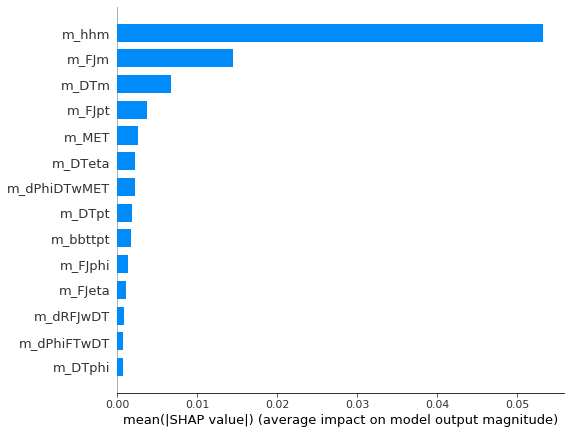

In [17]:
shap.summary_plot(shap_values, X_train,plot_type="bar")

In [18]:
shap_sum = np.abs(shap_values).mean(axis=0)
print(shap_sum)
indices = np.argsort(shap_sum)[::-1]
print(indices)
print(df.columns[indices])

[0.00374191 0.0011229  0.00137508 0.01445015 0.00178523 0.00225274
 0.00068957 0.00673049 0.0007401  0.00087148 0.00220009 0.00262479
 0.05315435 0.0016813 ]
[12  3  7  0 11  5 10  4 13  2  1  9  8  6]
Index(['m_hhm', 'm_FJm', 'm_DTm', 'm_FJpt', 'm_MET', 'm_DTeta', 'm_dPhiDTwMET',
       'm_DTpt', 'm_bbttpt', 'm_FJphi', 'm_FJeta', 'm_dRFJwDT', 'm_dPhiFTwDT',
       'm_DTphi'],
      dtype='object')


In [19]:
print(Y_train.mean(), explainer.expected_value)

0.9801602441816101 0.946


In [20]:
X_test.mean()

m_FJpt          0.401546
m_FJeta         0.506395
m_FJphi         0.502742
m_FJm           0.155162
m_DTpt          0.283002
m_DTeta         0.501848
m_DTphi         0.497902
m_DTm           0.247318
m_dPhiFTwDT     0.907747
m_dRFJwDT       0.484716
m_dPhiDTwMET    0.497513
m_MET           0.245783
m_hhm           0.370518
m_bbttpt        0.237027
dtype: float64

In [21]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j,explainer,shap_values,S):
    p = shap.force_plot(explainer.expected_value, shap_values[j], S.iloc[[j]])
    return(p)

In [22]:
# Explain the prediction of one instance
shap_plot(0,explainer,shap_values, X_test)

In [23]:
#shap.force_plot(explainer.expected_value,shap_values[:50,:],X_test.iloc[:50,:])

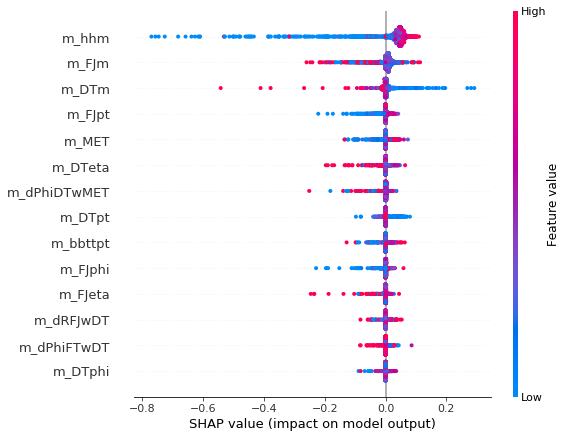

In [24]:
shap.summary_plot(shap_values, X_test)

In [25]:
expected_value = explainer.expected_value


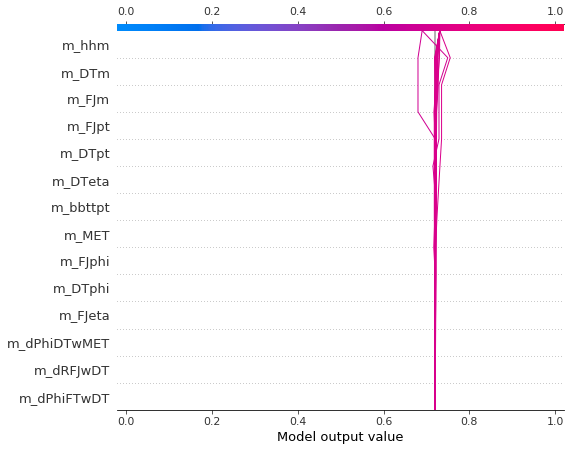

In [26]:
shap.decision_plot(expected_value, shap_values[0:30,:], df.iloc[0:30], link='logit')

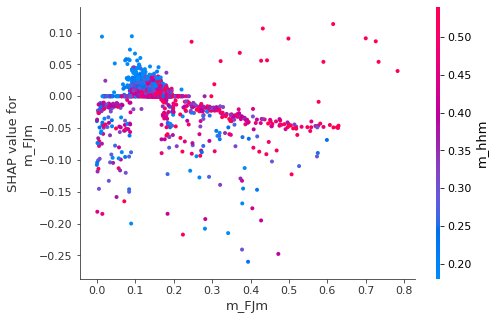

In [27]:
shap.dependence_plot("m_FJm", shap_values, X_test)